In [1]:
import pandas as pd
import numpy as np
from numpy import nan as NA
from pandas import DataFrame, Series
import re # regular expressions
#adding graphics
import matplotlib.pyplot as plt
%pylab inline
from pylab import rcParams
from collections import defaultdict
from collections import OrderedDict as od
rcParams['figure.figsize'] = 18, 6

Populating the interactive namespace from numpy and matplotlib


In [2]:
#all_df = pd.read_table('balances.csv', sep=',',index_col='Ref_Date') 
all_lic = pd.read_table('ontario_coord.csv', sep=',') 

#fix the dates
def addyear(x):
    ystr = x[6]+x[7]
    if (ystr>'18') :
        ystr = '19'+ystr
    else :
        ystr = '20'+ystr
    return ystr

def getarea(po) :
    area = po[:3]
    return area
# get rid of nulls in postal codes
all_lic= all_lic[pd.notnull(all_lic['Licence Address Line 3'])]
all_lic['year']=all_lic["Issued"].map(addyear)
all_lic['area']=all_lic['postal'].map(getarea)
print all_lic

        Unnamed: 0    Issued                    Operating Name  \
0                0  24/03/95                      EMERALD TAXI   
1                1  24/06/96                      PREMIER TAXI   
2                2  17/08/95                    A TORONTO TAXI   
3                3  03/03/88                       KIPLING KAB   
4                4  14/07/94                      RAINBOW TAXI   
5                5  02/02/95                        CROWN TAXI   
6                6  20/09/95                                     
7                7  25/04/80              EAST-END/HOWARD TAXI   
8                8  23/10/97                        RAPID TAXI   
9                9  28/03/94                               NaN   
10              10  28/03/94                               NaN   
11              11  17/01/92                     BEE LINE TAXI   
12              12  22/08/97                         MEGA-CITY   
13              13  24/07/98                        CROWN TAXI   
14        

In [12]:
cat = all_lic['Category']

d = defaultdict(int)

for c in cat :   
    d[c]+=1

df = DataFrame(d.items(),columns=['category','count'])
indf = df.set_index(['category'])
print indf.shape

cat500up = indf[indf['count']>=500]
cat100_500 = indf[indf['count']>=100]
cat100_500 = cat100_500[cat100_500['count']<500]
cat100down = indf[indf['count']<100]
print  cat100_500
#print cat100_500.shape
#print cat100down.shape
#print 
#indf['count'].plot()
#for attrib in d:
#        print attrib
#highcat = cat500up[cat500up['count']>5000]
#highcat.plot

(82, 1)
                                          count
category                                       
TAXICAB BROKER                              126
ENTERTAINMENT ESTABLISHMENT/NIGHTCLUB       121
DRAIN LAYER                                 254
COLLECTOR OF SECOND HAND GOODS              189
TEMPORARY FIREWORKS VENDOR (OVER 25 KG)     143
PRECIOUS METAL SHOP                         365
SECOND HAND SHOP                            430
ADULT ENTERTAINMENT CLUB                    123
BODY RUB PARLOUR                            146
PET SHOP                                    131
PLACE OF AMUSEMENT                          325
DRAIN CONTRACTOR                            304
SIDEWALK VENDING                            189
DRIVING SCHOOL OPERATOR (V)                 289
PRIVATE PARKING ENFORCEMENT AGENCY          143
LIMOUSINE SERVICE COMPANY                   198
TEMPORARY SIGN - A-FRAME                    199
DRIVEWAY PAVING CONTRACTOR                  163
TEMPORARY FIREWORKS VENDOR (UNDE

In [4]:
#Quickly fix the dates by adding 19 and 20


def buildCategory(cat):
    cat_target= all_lic [all_lic['Category']==cat]
    dest='categories/'+cat + '.csv'
    cat_target.to_csv(dest)
    return cat_target

In [5]:
def limit_year(dataset,start=None,end=None,year=None) :

    target = dataset
    if (start is not None):
        print " filtering for start year " + start
        target= target [target['year']>= start]
    if (end is not None) :
        print " filtering for end year " + end
        target = target[target['year']<= end]
    if (year is not None) :
        print " filtering for  year " + year
        target = target[target['year']== year]
    return target
        

In [7]:
year_rest = limit_year(buildCategory(cat='EATING ESTABLISHMENT'),year='2012')
print year_rest.shape

# here we build the weights of each area
def getweighted(dataset) :
    target = dataset
    areadict = defaultdict(int)
    for c in dataset['area'] :   
        areadict[c]+=1
    f = lambda x : areadict[x]
    target['w'] = target['area'].map(f)
    return target
year_w = getweighted(year_rest)

#ignore errors
year_w=year_w[year_w['lat']!=0]

year_w_heatdata= year_w[['lat','lng','w']]
heatmapdata= year_w_heatdata.to_records(index=False)
#print heatmapdata

import gmaps
m = gmaps.heatmap(heatmapdata, max_intensity=10, point_radius=4)

gmaps.display(m)

 filtering for  year 2012
(1452, 11)


In [57]:
print year_w.shape

(73, 12)


In [60]:
error_series=year_w[year_w['lat']==0]
print error_series

Empty DataFrame
Columns: [Unnamed: 0, Issued, Operating Name, Licence Address Line 3, Licence No., Category, postal, lat, lng, year, area, w]
Index: []


{'_trait_dyn_inits': {'keys': '_keys_default', 'log': '_log_default'}, '_trait_values': {'_view_name': u'HeatmapView', '_msg_callbacks': <IPython.html.widgets.widget.CallbackDispatcher object at 0x10ac087d0>, '_bounds': [(43.612283000000005, -79.64709), (43.846693, -79.21630400000001)], 'color': u'', '_view_module': u'', 'max_intensity': 5.0, 'height': '400px', '_property_lock': (None, None), 'visible': True, 'border_radius': u'', 'border_width': u'', 'background_color': u'', 'point_radius': 4.0, 'font_style': '', '_states_to_send': set([]), '_display_callbacks': <IPython.html.widgets.widget.CallbackDispatcher object at 0x10ac08d10>, '_model_module': None, '_send_state_lock': 0, 'width': '700px', 'version': 0, '_is_weighted': True, 'config': {}, 'font_family': u'', '_dom_classes': (), 'parent': None, '_model_name': u'WidgetModel', 'keys': ['_view_name', '_bounds', 'color', '_view_module', 'max_intensity', 'height', 'visible', 'border_radius', 'border_width', 'background_color', 'point_

In [8]:
range_reno = limit_year(buildCategory(cat='BUILDING RENOVATOR'),start='1970')
print range_reno.shape


 filtering for start year 1970
(11456, 11)


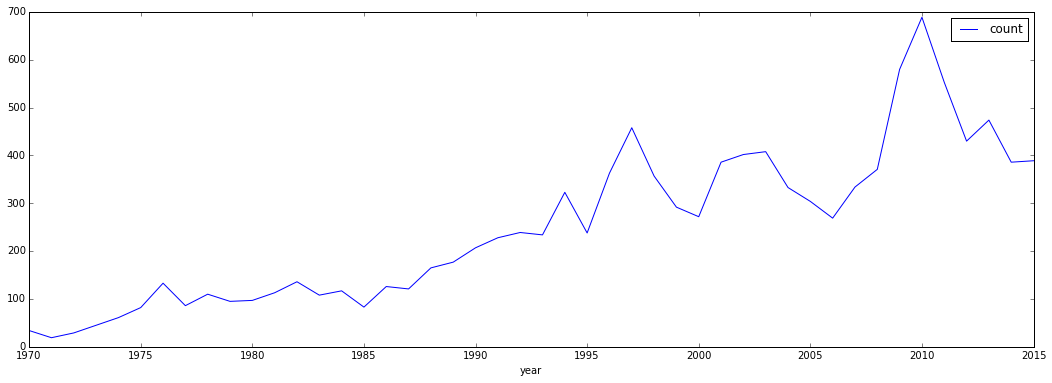

In [9]:
def gettotals(dataset,cat) :
    d = defaultdict(int)
    catseries=dataset[cat]
    for c in catseries :   
        d[c]+=1
    df = DataFrame(d.items(),columns=[cat,'count'])
    indf = df.set_index([cat])
    indf= indf.sort_index()
    return indf

reno = gettotals(range_reno,'year')

reno.plot()

    







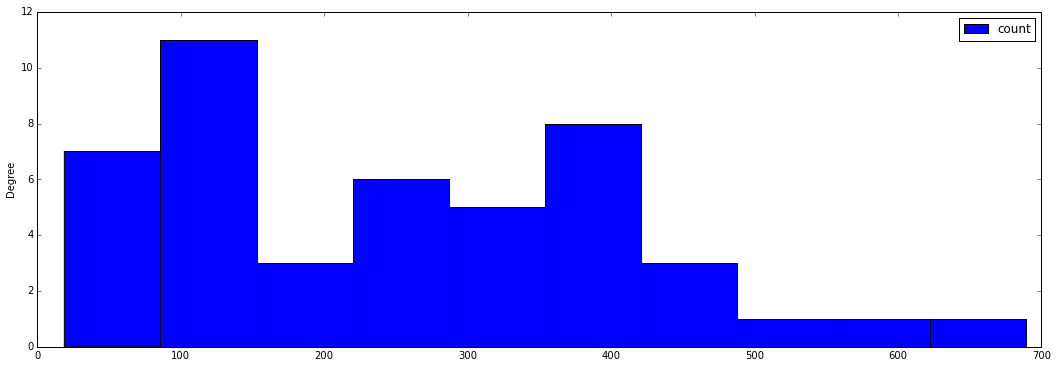

In [84]:
reno.plot(kind='hist')